<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/03machinelearning/contribuciones_estudiantes/Actividad_clase_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [16]:
df = pd.read_csv('heart.csv')

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Las enfermedades cardiovasculares son la causa de muertes número 1 a nivel global, con cerca de 18 millones de vidas perdidas cada año.

4 de cada 5 muertes por enfermedades cardiovasculares son por ataques al corazón y accidentes cerebrovasculares, y un tercio ocurren antes de los 70 años.

La falla al corazón es un evento causado por enfermedades cardiovasculares, y en este dataset se encuentran 11 variables que podrían servir en la predicción de una posible enfermedad al corazón.


In [18]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [19]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

df.replace({
    'Sex': {
        'M': 0,
        'F': 1
    }
}, inplace=True)

display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


In [33]:
# Los modelos realizados con df:
y = df['HeartDisease']
x = df.drop('HeartDisease', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,1,172,0,0.0,2
1,49,1,2,160,180,0,1,156,0,1.0,1
2,37,0,1,130,283,0,2,98,0,0.0,2
3,48,1,0,138,214,0,1,108,1,1.5,1
4,54,0,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,1,132,0,1.2,1
914,68,0,0,144,193,1,1,141,0,3.4,1
915,57,0,0,130,131,0,1,115,1,1.2,1
916,57,1,1,130,236,0,0,174,0,0.0,1


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # Removed 'saga'
}

# Increased max_iter to 5000 to help with convergence
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(x_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_log_reg.best_params_}")

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

best_knn = grid_search_knn.best_estimator_
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Hyperparameter tuning for Decision Tree
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dtree, cv=5, scoring='accuracy')
grid_search_dtree.fit(x_train, y_train)

best_dtree = grid_search_dtree.best_estimator_
print(f"Best parameters for Decision Tree: {grid_search_dtree.best_params_}")

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [34]:
# Regresión logística:
from sklearn.linear_model import LogisticRegression
# Codificar variables categóricas
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
# Asegurarse de que ambos conjuntos tengan las mismas columnas después de get_dummies
x_train, x_test = x_train.align(x_test, join='inner', axis=1, fill_value=0)
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000) # Aumenta max_iter si es necesario
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
# KNN:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # Número de vecinos (n_neighbors)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
# Árbol de decisión:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Primero se realizan las predicciones de cada modelo
y_pred_log_reg = log_reg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_dtree = dtree.predict(x_test)

--- Métricas para Regresión Logística ---
Accuracy: 0.8565
Precisión: 0.9024
Recall: 0.8409
F1-score: 0.8706
Matriz de Confusión:
[[ 86  12]
 [ 21 111]]


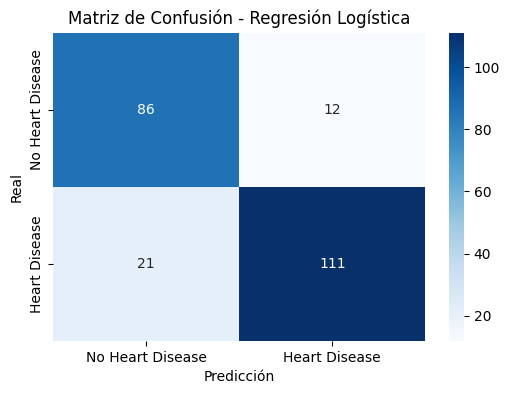

--- Métricas para Vecinos Más Cercanos (KNN) ---
Accuracy: 0.7174
Precisión: 0.7680
Recall: 0.7273
F1-score: 0.7471
Matriz de Confusión:
[[69 29]
 [36 96]]


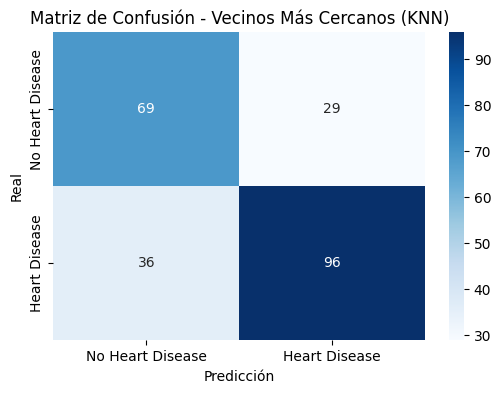

--- Métricas para Árbol de Decisión ---
Accuracy: 0.8000
Precisión: 0.8707
Recall: 0.7652
F1-score: 0.8145
Matriz de Confusión:
[[ 83  15]
 [ 31 101]]


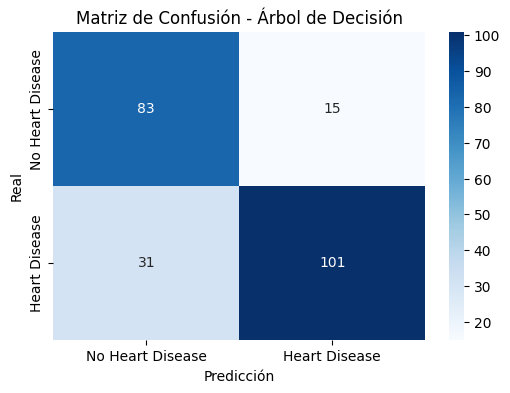

In [38]:
# Función para evaluar y reportar métricas
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- Métricas para {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluar y reportar para cada modelo
evaluate_model(y_test, y_pred_log_reg, "Regresión Logística")
evaluate_model(y_test, y_pred_knn, "Vecinos Más Cercanos (KNN)")
evaluate_model(y_test, y_pred_dtree, "Árbol de Decisión")

Reflexiona:

¿Qué aprendiste?

**Aprendí a aplicar modelos de predicción a datasets para determinar la probabilidad de que ocurra cierto acontecimiento, se obtenga cierto resultado o se calcule un promedio de cantidades en el futuro**

¿Qué fue lo más difícil?

**Elejir un problema donde sea necesario y efectivo el uso de machine learning para emplear y entrenar un modelo de predicción**

¿Cómo podría mejorarse?

**Observando y determinando patrones de los acontecimientos donde se sabe que el uso de machine learning es necesario y una ventaja, para luego lograr entendimiento de aquellas situaciones donde se puede entender con certeza que machine learning debe utilizarse**

¿Por qué es necesario usar Machine Learning en este caso?

**Porque los síntomas de las enfermedades de este tipo no son visibles a simple vista, sino que se requieren de exámenes que toman tiempo y dinero para realizarse. Por lo tanto, la aplicación de machine learning para un modelo de predicción de la enfermedad al corazón a base de información que los pacientes no sientan que se invade su privacidad, podría aplicarse en distintas clínicas y hospitales, donde sólo necesitan entregar esta información y el modelo podría predecir si padecen de la enfermedad, salvando sus vidas**

--- Métricas para Tuned Regresión Logística ---
Accuracy: 0.8609
Precisión: 0.9032
Recall: 0.8485
F1-score: 0.8750
Matriz de Confusión:
[[ 86  12]
 [ 20 112]]


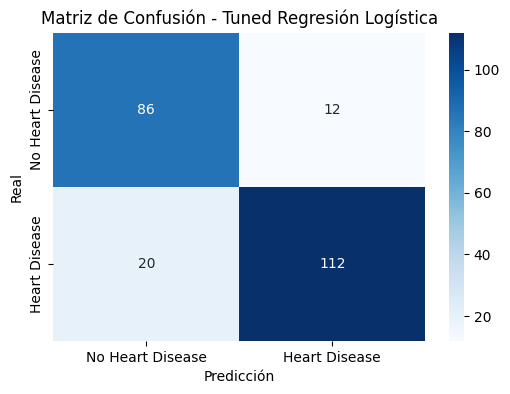

--- Métricas para Tuned Vecinos Más Cercanos (KNN) ---
Accuracy: 0.7348
Precisión: 0.7840
Recall: 0.7424
F1-score: 0.7626
Matriz de Confusión:
[[71 27]
 [34 98]]


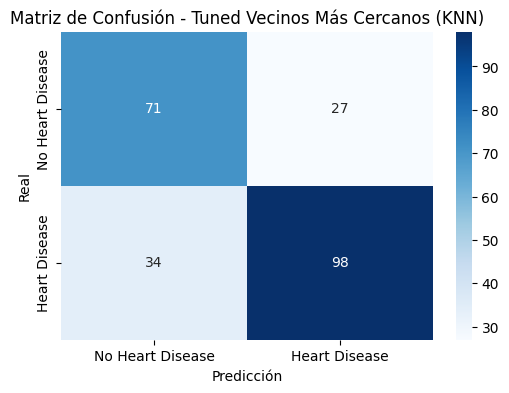

--- Métricas para Tuned Árbol de Decisión ---
Accuracy: 0.8565
Precisión: 0.8667
Recall: 0.8864
F1-score: 0.8764
Matriz de Confusión:
[[ 80  18]
 [ 15 117]]


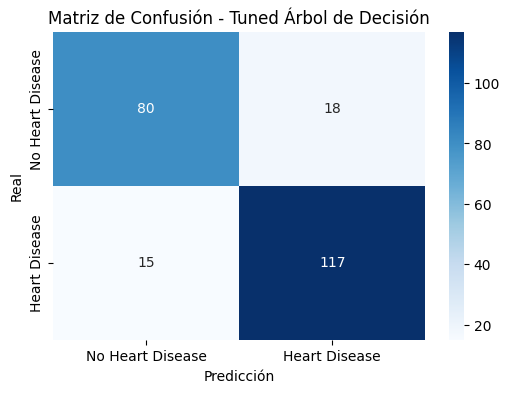

In [42]:
# Make predictions using the best estimators from the grid search
y_pred_tuned_log_reg = best_log_reg.predict(x_test)
y_pred_tuned_knn = best_knn.predict(x_test)
y_pred_tuned_dtree = best_dtree.predict(x_test)

# Evaluate and report metrics for each tuned model
evaluate_model(y_test, y_pred_tuned_log_reg, "Tuned Regresión Logística")
evaluate_model(y_test, y_pred_tuned_knn, "Tuned Vecinos Más Cercanos (KNN)")
evaluate_model(y_test, y_pred_tuned_dtree, "Tuned Árbol de Decisión")

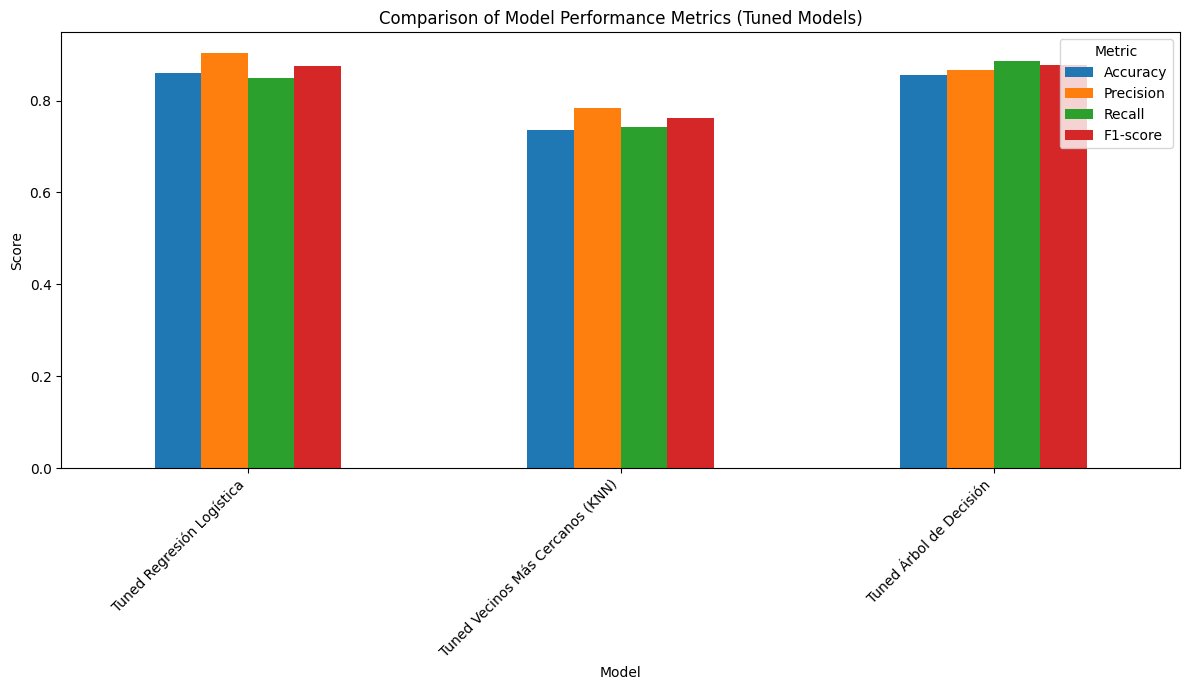

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract metrics from the evaluation output
model_names = ["Tuned Regresión Logística", "Tuned Vecinos Más Cercanos (KNN)", "Tuned Árbol de Decisión"]
accuracy_scores = [accuracy_score(y_test, y_pred_tuned_log_reg), accuracy_score(y_test, y_pred_tuned_knn), accuracy_score(y_test, y_pred_tuned_dtree)]
precision_scores = [precision_score(y_test, y_pred_tuned_log_reg), precision_score(y_test, y_pred_tuned_knn), precision_score(y_test, y_pred_tuned_dtree)]
recall_scores = [recall_score(y_test, y_pred_tuned_log_reg), recall_score(y_test, y_pred_tuned_knn), recall_score(y_test, y_pred_tuned_dtree)]
f1_scores = [f1_score(y_test, y_pred_tuned_log_reg), f1_score(y_test, y_pred_tuned_knn), f1_score(y_test, y_pred_tuned_dtree)]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Plotting the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Model Performance Metrics (Tuned Models)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()